In [148]:
import networkx as nx
from networkx.algorithms.shortest_paths.generic import has_path

In [123]:
def addNode(G, node):
    i,j = node
    G.add_node(i+j*7)
    return G

def addPlayer(G, src, dest, player):
    i_src, j_src = src # nodo de origen (donde se hace el primer clic)
    i_dest, j_dest = dest # nodo de destino (donde se hace el segundo clic)
    src_pos = i_src*7+j_src # posición del origen en notación vectorial (no matricial)
    dest_pos = i_dest*7+j_dest # posición del destino en notación vectorial (no matricial)
    G.nodes[src_pos]['player'] = player # el nodo del origen se queda pintado en el color del player
    G.nodes[dest_pos]['player'] = 1 if player==2 else 2 # el nodo de destino se queda pintado en el color del rival
    G.remove_edge(src_pos, dest_pos, key = 'possible_movement') # se elimina la arista src_dest como posible mov.
    G = updatePlayers(G, src_pos, src, player)
    G.remove_edges_from([edge for edge in G.edges(dest_pos) if G.has_edge(*edge, key = 'possible_movement')])
    G = addEdges(G, *dest)
    return G

def addFirstPlayer(G, dest, player):
    i,j = dest
    G.nodes[i+j*7]['player'] = player
    G = addEdges(G, *dest)
    return G

def addEdges(G, i, j):
    possible_movements = {(i+1,j),(i-1,j),(i,j+1),(i,j-1),(i+1,j-1),(i-1,j+1)}
    possible_movements = [(i*7+j, movement[0]*7 + movement[1]) for movement in possible_movements
                          if (movement in [(i,j) for i in range(7) for j in range(7)] # si la posición existe en el tablero
                               and not G.nodes[movement[0]*7+movement[1]]['player'])] # si no hay fichas en esa casilla
    [G.add_edge(i,j, key = 'possible_movement') for (i,j) in possible_movements]
    return G

def updatePlayers(G, src_pos, src, player):
    i,j = src
    possible_movements = {(i+1,j),(i-1,j),(i,j+1),(i,j-1),(i+1,j-1),(i-1,j+1)}
    possible_movements = [(i*7+j, movement[0]*7 + movement[1]) for movement in possible_movements
                          if (movement in [(i,j) for i in range(7) for j in range(7)] # si la posición existe en el tablero
                               and G.nodes[movement[0]*7+movement[1]]['player'] == player)]
    G.remove_edges_from([edge for edge in G.edges(src_pos) if not G.has_edge(*edge, key = 'possible_movement')])
    [G.add_edge(i,j, key = 'path') for (i,j) in possible_movements]
    return G

def checkWinner(G)

def getPossibleMovements(G, player):
    return [edge for node in G.nodes for edge in G.edges(node)
            if G.nodes[node]['player'] == (1 if player==2 else 2)]
    
def getBoard(G):
    return [[G.nodes[i*7+j]['player'] for j in range(7)] for i in range(7)]

In [160]:
G = nx.MultiGraph()
G.add_nodes_from(range(49), player = 0)

In [161]:
G = addFirstPlayer(G, (1,1), 2)

In [162]:
G.edges

MultiEdgeView([(1, 8, 'possible_movement'), (2, 8, 'possible_movement'), (7, 8, 'possible_movement'), (8, 9, 'possible_movement'), (8, 15, 'possible_movement'), (8, 14, 'possible_movement')])

In [163]:
G = addPlayer(G, (1,1), (1,2), 1)

In [164]:
G.edges

MultiEdgeView([(1, 8, 'possible_movement'), (2, 8, 'possible_movement'), (2, 9, 'possible_movement'), (3, 9, 'possible_movement'), (7, 8, 'possible_movement'), (8, 15, 'possible_movement'), (8, 14, 'possible_movement'), (9, 10, 'possible_movement'), (9, 15, 'possible_movement'), (9, 16, 'possible_movement')])

In [165]:
G = addPlayer(G, (1,1), (2,1), 2)

In [166]:
G.edges

MultiEdgeView([(1, 8, 'possible_movement'), (2, 8, 'possible_movement'), (2, 9, 'possible_movement'), (3, 9, 'possible_movement'), (7, 8, 'possible_movement'), (8, 14, 'possible_movement'), (8, 9, 'path'), (9, 10, 'possible_movement'), (9, 16, 'possible_movement'), (14, 15, 'possible_movement'), (15, 21, 'possible_movement'), (15, 22, 'possible_movement'), (15, 16, 'possible_movement')])

In [167]:
has_path(G,1,2)

True

In [168]:
G.edges

MultiEdgeView([(1, 8, 'possible_movement'), (2, 8, 'possible_movement'), (2, 9, 'possible_movement'), (3, 9, 'possible_movement'), (7, 8, 'possible_movement'), (8, 14, 'possible_movement'), (8, 9, 'path'), (9, 10, 'possible_movement'), (9, 16, 'possible_movement'), (14, 15, 'possible_movement'), (15, 21, 'possible_movement'), (15, 22, 'possible_movement'), (15, 16, 'possible_movement')])

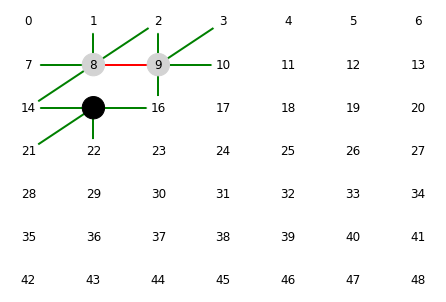

In [228]:
import matplotlib.pyplot as plt
import networkx as nx

pos = [(j,i) for i in range(6,-1,-1) for j in range(7)]
node_colours, edge_colours = [], []
for node in G.nodes:
    if not G.nodes[node]['player']: node_colours.append('white')
    elif G.nodes[node]['player'] == 1: node_colours.append('black')
    else: node_colours.append('lightgrey')

for edge in G.edges:
    if 'path' in edge: edge_colours.append('red')
    else: edge_colours.append('green')
        
nx.draw(G, pos, node_color=node_colours, edge_color = edge_colours, node_size=500, width = 2, with_labels=True)

plt.show()

In [205]:
for (a,b) in zip(G.edges, edge_colours):
    print(a,b)

(1, 8, 'possible_movement') white
(2, 8, 'possible_movement') white
(2, 9, 'possible_movement') white
(3, 9, 'possible_movement') white
(7, 8, 'possible_movement') white
(8, 14, 'possible_movement') white
(8, 9, 'path') black
(9, 10, 'possible_movement') white
(9, 16, 'possible_movement') white
(14, 15, 'possible_movement') white
(15, 21, 'possible_movement') white
(15, 22, 'possible_movement') white
(15, 16, 'possible_movement') white


In [174]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48))